Q1. To reduce the number of intensity levels in an image from 256 to 2, in integer powers
of 2. The desired number of intensity levels needs to be a variable input to your
program.  

Saving peakpx.jpg to peakpx (3).jpg
Enter the power of 2 for intensity levels (1-8): 6


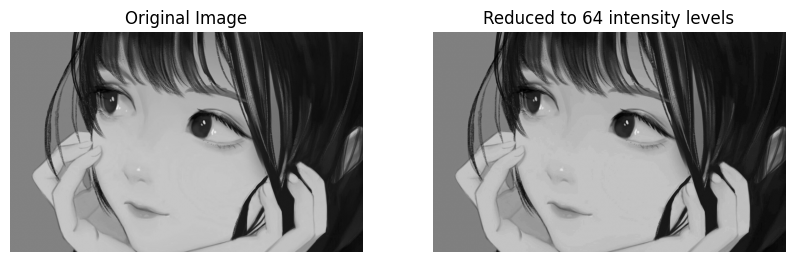

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()
image_path = next(iter(uploaded))
img = Image.open(image_path).convert('L')
img_array = np.array(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

while True:
    try:
        n = int(input("Enter the power of 2 for intensity levels (1-8): "))
        if 1 <= n <= 8:
            break
        else:
            print("Please enter a value between 1 and 8")
    except ValueError:
        print("Please enter a valid integer")

levels = 2**n
scaling_factor = 255 / (levels - 1)


reduced_img = np.floor(img_array / (256 / levels)) * (255 / (levels - 1))
reduced_img = reduced_img.astype(np.uint8)


plt.subplot(1, 2, 2)
plt.imshow(reduced_img, cmap='gray')
plt.title(f'Reduced to {levels} intensity levels')
plt.axis('off')
plt.show()

Saving peakpx.jpg to peakpx (4).jpg
Enter the power of 2 for intensity levels (1-8): 2


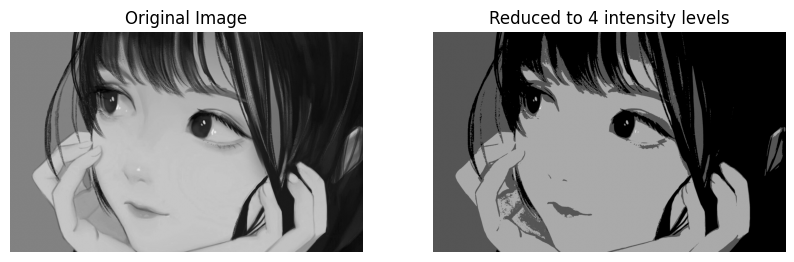

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = next(iter(uploaded))
img = Image.open(image_path).convert('L')
img_array = np.array(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

while True:
    try:
        n = int(input("Enter the power of 2 for intensity levels (1-8): "))
        if 1 <= n <= 8:
            break
        else:
            print("Please enter a value between 1 and 8")
    except ValueError:
        print("Please enter a valid integer")

levels = 2**n
scaling_factor = 255 / (levels - 1)


reduced_img = np.floor(img_array / (256 / levels)) * (255 / (levels - 1))
reduced_img = reduced_img.astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(reduced_img, cmap='gray')
plt.title(f'Reduced to {levels} intensity levels')
plt.axis('off')
plt.show()

Q2.Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat
the process for a 10x10 neighborhood and again for a 20x20 neighborhood.

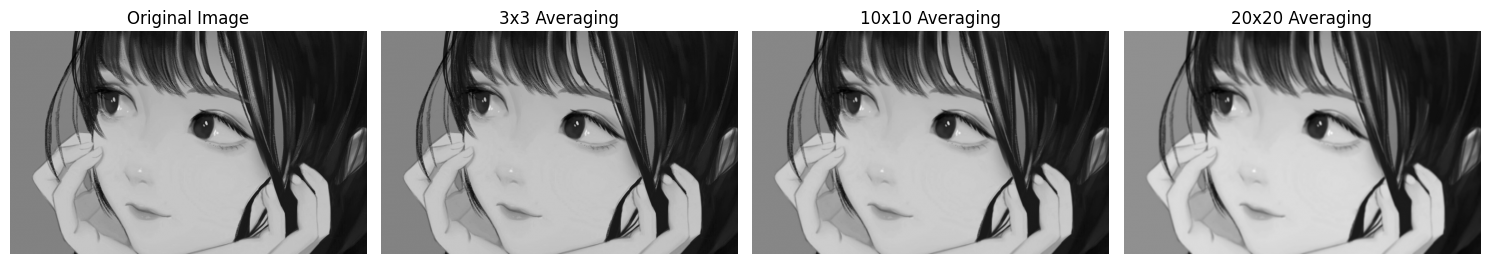

In [4]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter
from google.colab import files

if 'image_path' not in locals():
    uploaded = files.upload()
    image_path = next(iter(uploaded))
img = Image.open(image_path).convert('L')
img_array = np.array(img)

kernel_sizes = [3, 10, 20]

plt.figure(figsize=(15, 5))

plt.subplot(1, len(kernel_sizes)+1, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, size in enumerate(kernel_sizes):
    averaged_img = uniform_filter(img_array, size=size)

    plt.subplot(1, len(kernel_sizes)+1, i+2)
    plt.imshow(averaged_img, cmap='gray')
    plt.title(f'{size}x{size} Averaging')
    plt.axis('off')

plt.tight_layout()
plt.show()

Q3,Rotate an image by 45 and 90 degrees.

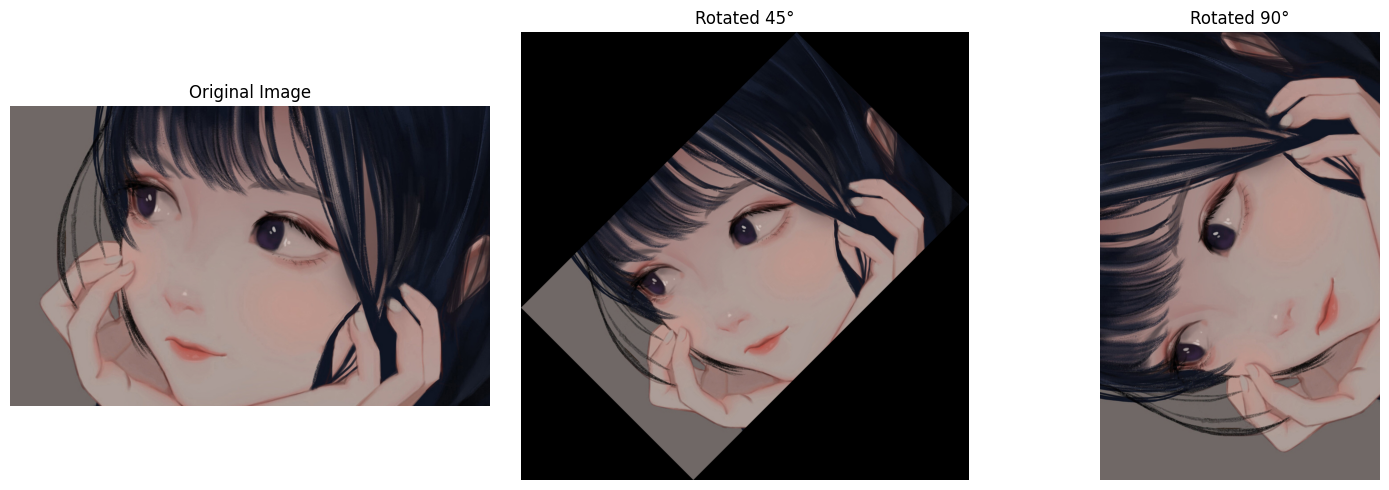

In [9]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


if 'image_path' not in locals():
    uploaded = files.upload()
    image_path = next(iter(uploaded))
img = Image.open(image_path)

angles = [45, 90]


plt.figure(figsize=(15, 5))


plt.subplot(1, len(angles)+1, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')


for i, angle in enumerate(angles):
    rotated_img = img.rotate(angle, expand=True)

    plt.subplot(1, len(angles)+1, i+2)
    plt.imshow(rotated_img)
    plt.title(f'Rotated {angle}°')
    plt.axis('off')

plt.tight_layout()
plt.show()

Q4.For every 3×3 block of the image (without overlapping), replace all the corresponding
9 pixels by their average. This operation simulates reducing the image spatial
resolution. Repeat this for 5×5 blocks and 7×7 blocks.  

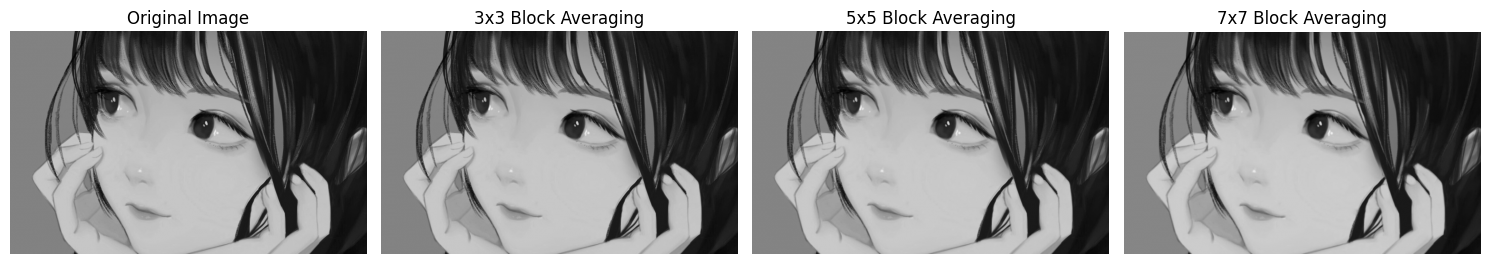

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

if 'image_path' not in locals():
    uploaded = files.upload()
    image_path = next(iter(uploaded))
img = Image.open(image_path).convert('L')
img_array = np.array(img)


block_sizes = [3, 5, 7]


plt.figure(figsize=(15, 5))


plt.subplot(1, len(block_sizes)+1, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, block_size in enumerate(block_sizes):
    h, w = img_array.shape
    new_h = h // block_size
    new_w = w // block_size


    blocked = img_array[:new_h*block_size, :new_w*block_size]
    blocked = blocked.reshape(new_h, block_size, new_w, block_size)
    reduced_img = blocked.mean(axis=(1, 3))


    upscaled = np.kron(reduced_img, np.ones((block_size, block_size)))

    plt.subplot(1, len(block_sizes)+1, i+2)
    plt.imshow(upscaled, cmap='gray')
    plt.title(f'{block_size}x{block_size} Block Averaging')
    plt.axis('off')

plt.tight_layout()
plt.show()